## 0309

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from scipy.stats import skew
from scipy.stats import boxcox

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("cell.csv")

In [3]:
data = data.iloc[:, 1:]
print("shape of data:", data.shape)
data.head()

shape of data: (2019, 119)


,Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
0,207827637,Test,PS,143.247705,1,185,0,15.711864,3.954802,9.548023,...,12.474676,7.609035,2.714100,0,2,2,10.642974,2,42,14
1,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,207932470,Train,PS,69.150325,0,298,0,19.456140,101.294737,28.217544,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
4,207932455,Test,PS,2.887837,2,285,0,24.275735,111.415441,20.474265,...,15.407972,20.504288,45.450457,0,0,0,13.198561,0,283,159


In [4]:
train_data = data[data["Case"]=="Train"]
test_data = data[data["Case"]=="Test"]

In [5]:
print("shape of data:", train_data.shape)
train_data.head()

shape of data: (1009, 119)


,Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
1,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,207932470,Train,PS,69.150325,0,298,0,19.456140,101.294737,28.217544,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
11,207932484,Train,WS,109.416426,0,256,0,18.828571,125.938776,13.600000,...,13.922937,18.643027,40.331747,0,0,2,17.546861,0,211,495
14,207932459,Train,PS,104.278654,0,258,0,17.570850,124.368421,22.461538,...,12.324971,17.747143,41.928533,0,0,2,17.660339,0,172,207


`
cellID <- segData$Cell

class <- segData$Class

case <- segData$Case

segData <- segData[, -(1:3)]

dim(segData)
`

In [10]:
cellID = train_data["Cell"]
Class = train_data["Class"]
case = train_data["Case"]
train_X = train_data.iloc[:, 3:]
print("shape of train_X:", train_X.shape)

shape of train_X: (1009, 116)


In [22]:
for name in train_X.columns:
    if "Status" in name:
        train_X.pop(name)
print("shape of train_X:", train_X.shape)

shape of train_X: (1009, 58)


In [25]:
skew(train_X["AngleCh1"])

-0.024298630435426752

In [28]:
skew_dict = {train_X.columns[idx]: skew(train_X.iloc[:, idx])
            for idx in range(len(train_X.columns))}

In [31]:
AreaCh1, lambda_ = boxcox(train_X["AreaCh1"])

In [32]:
print(type(AreaCh1))
print(lambda_)

<class 'numpy.ndarray'>
-0.8558686876415129


## 0316

In [2]:
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

In [3]:
data = pd.read_csv("BloodBrain.csv")
data = data.iloc[:, 1:]

In [4]:
data.head()

,tpsa,nbasic,negative,vsa_hyd,a_aro,weight,peoe_vsa.0,peoe_vsa.1,peoe_vsa.2,peoe_vsa.3,...,scaa3,ctdh,ctaa,mchg,achg,rdta,n_sp2,n_sp3,o_sp2,o_sp3
0,12.030000,1,0,167.06700,0,156.293,76.94749,43.44619,0.00000,0.000000,...,-0.0093,1,1,0.9241,0.9241,1.0000,0.000000,6.0255,0.000000,0.000000
1,49.330002,0,0,92.64243,6,151.165,38.24339,25.52006,0.00000,8.619013,...,-0.0754,2,2,1.2685,1.0420,1.0000,0.000000,6.5681,32.010201,33.613499
2,50.529999,1,0,295.16700,15,366.485,58.05473,124.74020,21.65084,8.619013,...,-0.0303,1,4,1.2562,1.2562,0.2500,26.973301,10.8567,0.000000,27.545099
3,37.389999,0,0,319.11220,15,382.552,62.23933,124.74020,13.19232,21.785640,...,-0.0240,1,3,1.1962,1.1962,0.3333,21.706499,11.0017,0.000000,15.131600
4,37.389999,1,0,299.65800,12,326.464,74.80064,118.04060,33.00190,0.000000,...,-0.0255,1,3,1.2934,1.2934,0.3333,24.206100,10.8109,0.000000,15.133300


In [5]:
selector = VarianceThreshold(threshold=1e-4)
data_select = pd.DataFrame(selector.fit_transform(data))
print(len(selector.feature_names_in_))
data_select.head()

134


,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,12.030000,1.0,0.0,167.06700,0.0,156.293,76.94749,43.44619,0.00000,0.000000,...,-0.0093,1.0,1.0,0.9241,0.9241,1.0000,0.000000,6.0255,0.000000,0.000000
1,49.330002,0.0,0.0,92.64243,6.0,151.165,38.24339,25.52006,0.00000,8.619013,...,-0.0754,2.0,2.0,1.2685,1.0420,1.0000,0.000000,6.5681,32.010201,33.613499
2,50.529999,1.0,0.0,295.16700,15.0,366.485,58.05473,124.74020,21.65084,8.619013,...,-0.0303,1.0,4.0,1.2562,1.2562,0.2500,26.973301,10.8567,0.000000,27.545099
3,37.389999,0.0,0.0,319.11220,15.0,382.552,62.23933,124.74020,13.19232,21.785640,...,-0.0240,1.0,3.0,1.1962,1.1962,0.3333,21.706499,11.0017,0.000000,15.131600
4,37.389999,1.0,0.0,299.65800,12.0,326.464,74.80064,118.04060,33.00190,0.000000,...,-0.0255,1.0,3.0,1.2934,1.2934,0.3333,24.206100,10.8109,0.000000,15.133300


<AxesSubplot:>

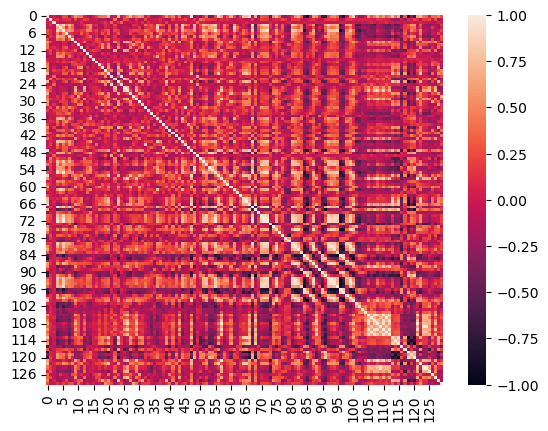

In [10]:
corr = data_select.corr()
plt.figure()
sns.heatmap(corr)

In [11]:
def find_correlation(df, thresh=0.9):
    """
    Given a numeric pd.DataFrame, this will find highly correlated features,
    and return a list of features to remove
    params:
    - df : pd.DataFrame
    - thresh : correlation threshold, will remove one of pairs of features with
               a correlation greater than this value
    """
    
    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)

    already_in = set()
    result = []

    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)


    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [12]:
data_highCorr = find_correlation(data_select, thresh=0.75)

In [14]:
len(data_highCorr)

75